In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

/Users/sam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def encode_col(x, col):
    '''
    This is a helper function for load_and_format_x_y()
    This function takes in a dataframe of x predictors. 
    Initiates a OneHotEncoder with handle_unknown="ignore" to 
    compensate for unseen artists in new data, 
    And returns the dataframe with the artist column encoded.
    '''
    # initiate OHE
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    # dataframe of just encoded columns, using x_train index as it's index to ensure rows line up
    ohe.fit(x[[f'{col}']])
    grade_dummies = pd.DataFrame(ohe.transform(x[[f'{col}']]).todense(), columns=ohe.get_feature_names(), index=x.index)
    # concat encoded columns to x
    concatted_x = pd.concat([x, grade_dummies], axis=1)
    #add column names
    col_names = ohe.get_feature_names()
    concatted_x.columns = list(x.columns) + list(col_names)
    concatted_x = concatted_x.drop(f'{col}', axis=1)
    return concatted_x

In [3]:
data = pd.read_csv('train_data.csv')
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

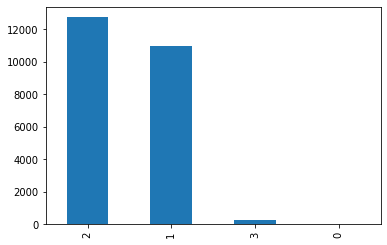

In [4]:
data['MARRIAGE'].value_counts().plot(kind='bar')

In [5]:
data['MARRIAGE'].value_counts()

2    12735
1    10958
3      263
0       43
Name: MARRIAGE, dtype: int64

In [6]:
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

In [7]:
X['LIMIT_BAL'].unique()

array([ 350000,   50000,   20000,  110000,  240000,  360000,  160000,
         90000,   80000,  310000,   30000,  140000,  120000,  200000,
        230000,  300000,  180000,   60000,  100000,  500000,  210000,
        440000,  320000,  280000,  450000,  460000,  390000,  260000,
        250000,  130000,  290000,  170000,   70000,  400000,  340000,
        150000,  420000,   10000,  190000,  270000,  480000,  330000,
         40000,  220000,  490000,  430000,  410000,  580000,  380000,
        610000,  370000,  800000,  470000,  600000,  520000,  510000,
        660000,  710000,  700000,  590000,  570000,  530000,  560000,
        550000,  630000,  750000,  680000,  620000,  640000,  540000,
         16000,  650000,  740000,  670000,  720000,  690000, 1000000,
        730000,  780000,  327680])

In [8]:
X = encode_col(X, 'LIMIT_BAL')

In [9]:
'limit_balance:'+'x0_690000'[3:]

'limit_balance:690000'

In [10]:
X

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,x0_690000,x0_700000,x0_710000,x0_720000,x0_730000,x0_740000,x0_750000,x0_780000,x0_800000,x0_1000000
0,2873,1,1,2,37,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3598,2,2,1,37,2,2,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27623,2,1,2,23,-1,-1,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6874,1,3,1,56,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6444,2,2,2,32,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23994,7886,2,1,2,24,0,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23995,7750,1,3,1,44,-1,-1,-1,-1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23996,14379,1,3,2,26,2,0,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23997,23664,2,2,1,38,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
billcols = []
for num in range(1,7):
    colname = f'BILL_AMT{num}'
    billcols.append(colname)
paycols = []
for num in range(1,7):
    colname = f'PAY_AMT{num}'
    paycols.append(colname)
    nums =[0,2,3,4,5,6]
payscore_cols = []
for num in nums:
    col = f'PAY_{num}'
    payscore_cols.append(col)
X['TOTAL_BILL_AMT'] = X['BILL_AMT1']+X['BILL_AMT2']+X['BILL_AMT3']+X['BILL_AMT4']+X['BILL_AMT5']+X['BILL_AMT6']
X['TOTAL_PAY_AMT'] = X['PAY_AMT1']+X['PAY_AMT2']+X['PAY_AMT3']+X['PAY_AMT4']+X['PAY_AMT5']+X['PAY_AMT6']
X['PAY_SCORE'] = X['PAY_0']+X['PAY_2']+X['PAY_3']+X['PAY_4']+X['PAY_5']+X['PAY_6']

In [12]:
for col in billcols:
    X = X.drop(col, axis=1)
for col in paycols:
    X = X.drop(col, axis=1)
X = X.drop('ID', axis=1)

In [13]:
X['PAY_SCORE']

0       -12
1         6
2        -6
3         2
4         0
         ..
23994    -6
23995    -6
23996     8
23997     0
23998     7
Name: PAY_SCORE, Length: 23999, dtype: int64

In [14]:
X['EDUCATION'] = X['EDUCATION'].replace(6, 5) 

In [15]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [17]:
smote = SMOTE(random_state=1)
x_tr_re, y_tr_re = smote.fit_resample(x_train, y_train)

In [18]:
y_tr_re.value_counts()

1    14018
0    14018
Name: default payment next month, dtype: int64

In [19]:
rf = RandomForestClassifier()
rf.fit(x_tr_re, y_tr_re)
rf.score(x_tr_re, y_tr_re)

0.9996433157369097

In [20]:
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4673
           1       0.56      0.43      0.48      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.66      0.68      6000
weighted avg       0.78      0.80      0.79      6000



In [21]:
f1_score(y_test, rf.predict(x_test))

0.48287671232876705

PCA


In [22]:
pca = PCA(n_components=3)
x_tr_pca_re = pca.fit_transform(x_tr_re)
x_te_pca = pca.fit_transform(x_test)

In [23]:
smote = SMOTE(random_state=1)
x_tr_pca_re, y_tr_re = smote.fit_resample(x_tr_pca_re, y_tr_re)

In [24]:
pca_rf = RandomForestClassifier()
pca_rf.fit(x_tr_pca_re, y_tr_re)
pca_rf.score(x_tr_pca_re, y_tr_re)

0.9996433157369097

In [26]:
pca_rf.score(x_te_pca, y_test)

0.5476666666666666

In [27]:
f1_score(y_test, pca_rf.predict(x_te_pca))

0.41356957649092485

In [ ]:
unseen = pd.read_csv('test_features.csv')

In [ ]:
unseen = encode_col(unseen, 'LIMIT_BAL')

In [ ]:
unseen['TOTAL_BILL_AMT'] = unseen['BILL_AMT1']+unseen['BILL_AMT2']+unseen['BILL_AMT3']+unseen['BILL_AMT4']+unseen['BILL_AMT5']+unseen['BILL_AMT6']
unseen['TOTAL_PAY_AMT'] = unseen['PAY_AMT1']+unseen['PAY_AMT2']+unseen['PAY_AMT3']+unseen['PAY_AMT4']+unseen['PAY_AMT5']+unseen['PAY_AMT6']
unseen['PAY_SCORE'] = unseen['PAY_0']+unseen['PAY_2']+unseen['PAY_3']+unseen['PAY_4']+unseen['PAY_5']+unseen['PAY_6']

In [ ]:
for col in billcols:
    unseen = unseen.drop(col, axis=1)
for col in paycols:
    unseen = unseen.drop(col, axis=1)
unseen = unseen.drop('ID', axis=1)

In [ ]:
unseen['EDUCATION'] = unseen['EDUCATION'].replace(6, 5) 

In [ ]:
ss = StandardScaler()
unseen = ss.fit_transform(unseen)

In [ ]:
pca = PCA(n_components=3)
unseen_pca = pca.fit_transform(unseen)

In [ ]:
preds = pd.DataFrame(pca_rf.predict(unseen_pca))

In [ ]:
preds.to_csv('predictions_st.csv', index=False)